<a href="https://colab.research.google.com/github/jordan-dsouza/OIBSIP/blob/main/Iris_Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Classification using KNN:**

In [1]:
#Importing libraries:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
sns.set()

In [2]:
#Loading the dataset:
df = pd.read_csv("Iris.csv")
#Display the dataset:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping Id since it is not necessary:
df = df.drop("Id", axis = 1)

In [4]:
#Checking for null values:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#Describe() shows summary statistics for dataframe:
#We can see the mean length and width of the sepals and petals and also the minimum and maximum values.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Number of samples in each category:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
#Unique() finds unique elements and sorts them in an array:
#Here the species names are displayed (categorical):
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#**Exploratory Data Analysis:**

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

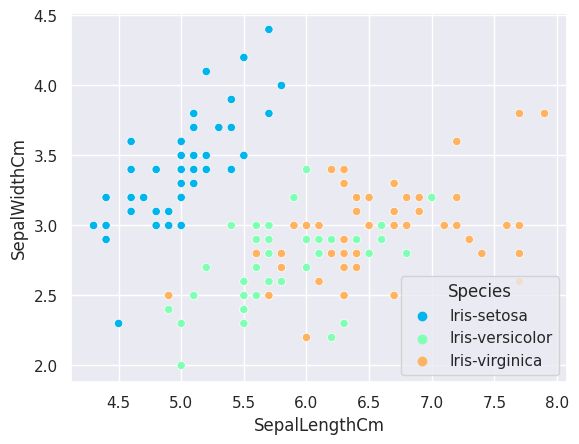

In [8]:
#Scatter plot for sepal dimensions:
#Here in this plot we can see the sepal length vs width of three species.
#We can see that setosa has the maximum sepal width of about 4.4mm, virginica has the maximum sepal length of about 7.9mm.
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, hue = "Species", palette = "rainbow")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

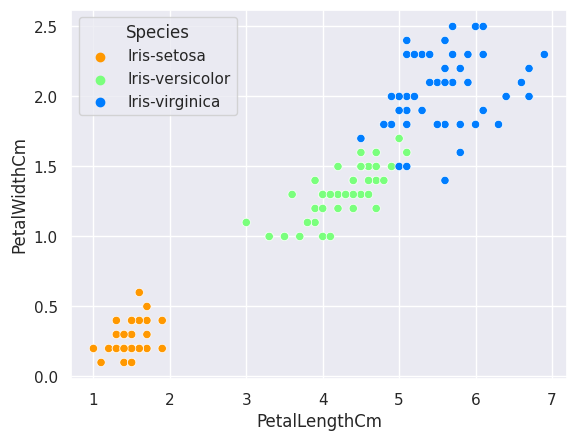

In [9]:
#Scatter plot for petal dimensions:
#Here we see the plots for petal width and length of the three species:
#We see that setosa has the smallest and virginica has the largest dimensions.
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df, hue = "Species", palette = "jet_r")

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

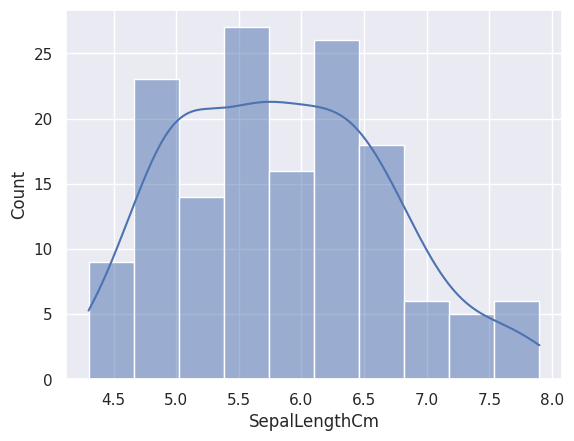

In [10]:
#Histogram shows us the range of sepal length:
#KDE is short for kernel density estimate and estimates probability distribution function using kernels as weights.
sns.histplot(df["SepalLengthCm"], kde = True, bins=10)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

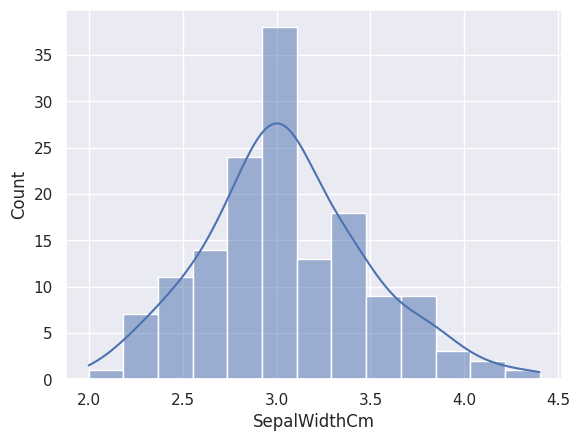

In [11]:
#Sepal width histogram:
sns.histplot(df["SepalWidthCm"], kde = True)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

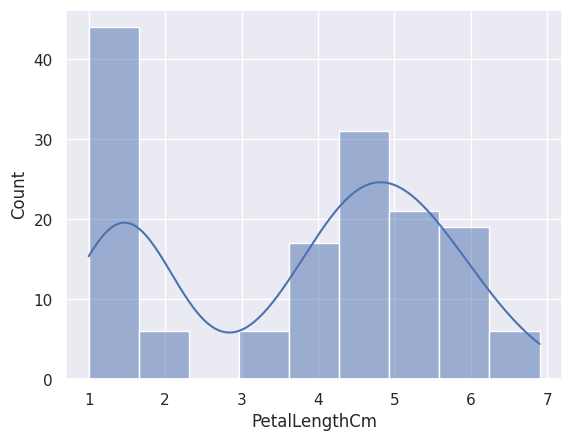

In [12]:
#Petal length histogram:
sns.histplot(df["PetalLengthCm"], kde = True)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

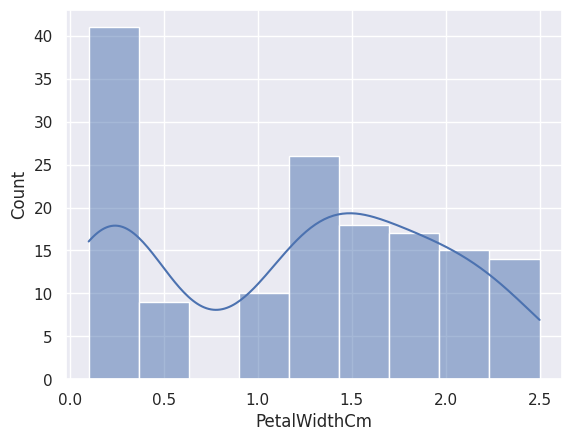

In [13]:
#Petal width histogram:
sns.histplot(df["PetalWidthCm"], kde = True)

#**Model:**

In [14]:
data = df.copy()
#data["Species"] = data["Species"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#Dropping species from x as it doesn't contain the numerical values we need:
#x is independent variable and y is dependent variable:
x = data.drop("Species", axis=1)
y = data["Species"]

In [16]:
print(x.shape, y.shape)

(150, 4) (150,)


In [17]:
#Importing for training/testing:
from sklearn.model_selection import train_test_split
#Training the model:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#Importing classifier from sklearn:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
#Prediction:
y_pred = knn.predict(x_test)

In [19]:
#Accuracy:
accuracy = knn.score(x_test, y_test)*100
print(accuracy,"%")

100.0 %


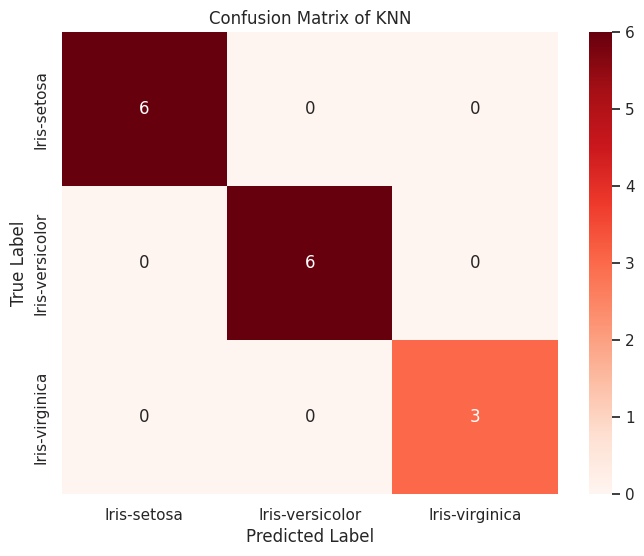

In [20]:
#Creating confusion matrix:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

In [21]:
#Trying to predict using my own values:
#x_new has the class label values for prediction of species:
#Array consists of [sepal_length, sepal_width, petal_length, petal_width]:
x_new = np.array([[6.5, 3.8,	5.3, 2.3]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
#Using nearest neighbour algorithm, the species is predicted.

Prediction: ['Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
